In [2]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
%pip install -Uqq fastai lxml

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from lxml import etree
from fastcore.all import *
from fastai.vision.all import *

/home/javierbarbosa/Documents/ML/.envml/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
path = Path('VGG-Face2/data')
train_path = path/'train'
test_path = path/'test'
train_files = get_image_files(train_path)

In [43]:
df = pd.read_xml(path/'finalTest.xml')
df = df.set_index('id')

In [44]:
len(df)

500

In [45]:
def get_ethnicity(x): return df['ethnicity'].get(x.parent.name,10)

In [46]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y = get_ethnicity,
    splitter=RandomSplitter(0.2, seed=42),
    item_tfms=Resize(192, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75)
).dataloaders(test_path)

In [47]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/home/javierbarbosa/Documents/ML/.envml/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/javierbarbosa/Documents/ML/.envml/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [48]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.541876,0.476888,0.176806,1:07:21


epoch,train_loss,valid_loss,error_rate,time
0,0.266787,0.257694,0.093007,1:35:17
1,0.189485,0.173467,0.062310,1:38:51
2,0.134343,0.144655,0.050769,1:33:07


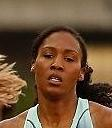

In [72]:
folder = 'n000371'
sample_image = get_image_files(path/'train'/folder)[0]
img = PILImage.create(sample_image)
img.to_thumb(128)

In [73]:
ethnicity,_,probs = learn.predict(img)
ethnicity


'1'